# ML Lab 2 - Decision Trees

## Important: Autograder

This lab will be automarked, thus failure to follow instructions will result in a mark of zero. Only the cells with the comment `# STUDENT CODE` will be used by the autograder. These cells have custom metadata, so if you delete and re-add them or add new cells with the comment `# STUDENT CODE` they will not be recognised by the autograder. If you accidentally delete a `# STUDENT CODE` cell then you must redownload the notebook and copy your answers across.

You may add extra code cells for your own use, but they will not be run by the autograder. 

Public test cases are given to test your code, but the autograder will use an unseen dataset to determine the correctness of your code and determine your mark. If you hack your code to just work on the provided test cases you will recieve zero.

## Student Details

Fill in your names and student numbers in the fields below. This is used for the automarker, so if you do this incorrectly **you will recieve zero** as your submission will not be recognised.

**Note:** `student_names[0]` should correspond to the same student as `student_nos[0]` and similarly for the other students indicated.

In [1]:
# STUDENT CODE: Student Info
student_names = ["Muhammad Hoosen", "Rameez Atif", "Sufyaan Mahomed"]  # List of strings containing student names
student_nos = ["2552770", "2612521", "2564009"]  # List of strings containing student nos

assert len(student_names) == len(student_nos)

## Imports & Helper Functions

In [3]:
import pandas as pd
import numpy as np
import pprint

import matplotlib.pyplot as plt
import matplotlib.patches as patches

Matplotlib is building the font cache; this may take a moment.


#### Visualise Tree Helper Function
Below is a helper function for visualising a decision tree for Q4. Ignore the arguments `node_position`, `x_range` and `y_range`. 

In [12]:
def visualise_tree(tree, node_position=(0.5, 0.9), x_range=(0, 1), y_range=(0, 1), ax=None):
    """
    Visualizes the decision tree using matplotlib.

    Args:
        tree (dict): The decision tree.
        node_position (tuple): The position of the current node.
        x_range (tuple): The x-axis range for the current subtree.
        y_range (tuple): The y-axis range for the current subtree.
        ax (matplotlib.axes.Axes): The axes object to draw on.

    Returns:
        tuple: (fig, ax) tuple, where fig is the figure and ax is the axes object.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.axis('off')
    else:
        fig = ax.get_figure()

    node_text = list(tree.keys())[0]
    ax.text(node_position[0], node_position[1], node_text, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

    if isinstance(tree[node_text], dict):
        num_children = len(tree[node_text])
        child_x_positions = np.linspace(x_range[0], x_range[1], num_children + 2)[1:-1]
        child_y_position = node_position[1]  - (y_range[1] - y_range[0]) * 0.2
        # child_y_range = (y_range[0], child_y_position)
        child_y_range = (y_range[0], child_y_position)

        child_index = 0
        for child_value, child_subtree in tree[node_text].items():
            child_x_position = child_x_positions[child_index]

            # Draw connection line
            # ax.plot([node_position[0], child_x_position], [node_position[1] - 0.05, child_y_position + 0.05], 'k-', linewidth=1)
            ax.plot([node_position[0], child_x_position], [node_position[1] - 0.01, child_y_position + 0.01], 'k-', linewidth=1)

            # Draw child value text
            mid_x = (node_position[0] + child_x_position) / 2
            mid_y = (node_position[1] + child_y_position) / 2
            ax.text(mid_x, mid_y, child_value, ha='center', va='center', rotation=np.degrees(np.arctan2(child_y_position - node_position[1], child_x_position - node_position[0])) , bbox=dict(facecolor='white', edgecolor='none'))

            if isinstance(child_subtree, dict):
                visualise_tree(child_subtree, (child_x_position, child_y_position), (child_x_positions[child_index] - (x_range[1] - x_range[0]) / (num_children * 2), child_x_positions[child_index] + (x_range[1] - x_range[0]) / (num_children*2)), child_y_range, ax)
            else:
                ax.text(child_x_position, child_y_position, str(child_subtree), ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

            child_index += 1

    return fig, ax

## Load Data
**We will be using the "play tennis" dataset we saw in class.** 

In [13]:
tennis_df = pd.read_csv("playtennis.csv")
tennis_df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


## Question 1
Implement the `calc_entropy` function with takes as input a panda series consisting of the relevant `PlayTennis` labels and outputs the corresponding entropy (represented as a float) as calculated using the equation in the notes.

In [14]:
# STUDENT CODE: Q1
# This cell should not contain any code outside this function and should not use any global variables
def calc_entropy(labels):
    """
    Calculates the entropy of a given set of labels.

    Args:
        labels (pd.Series): A pandas Series consisting of the relevant PlayTennis labels.

    Returns:
        float: The corresponding entropy.
    """
    assert type(labels) == pd.Series, f"labels is of the wrong type type(labels)=={type(labels)}"
    count = labels.value_counts()
    probability = count/len(labels)
    entropy = -sum(probability*np.log2(probability))
    # TODO
    return entropy

In [15]:
# Run this to check result
print(f"H(D) = {calc_entropy(tennis_df['PlayTennis'])}")

H(D) = 0.9402859586706311


**Public Test Case: Q1**

In [16]:
q1_ans = calc_entropy(tennis_df['PlayTennis'])
if not isinstance(q1_ans, float):
    print(f"Public Test Case: Q1 - FAILED: Wrong type")
elif np.round(q1_ans, 3) != 0.94:
    print(f"Public Test Case: Q1 - FAILED: Incorrect value")
else:
    print(f"Public Test Case: Q1 - PASSED")

Public Test Case: Q1 - PASSED


## Question 2
Here you will implement $Gain(H, F)$.

Implement the `calc_information_gain` function, which takes as input:
- `data`: the dataset (or subset of the dataset) represented as a Pandas dataframe
- `feature`: the feature variable
- `target`: the name of the target variable - i.e. "PlayTennis"

and outputs the information gain obtained when splitting the data off the given feature. Use the entropy function you implemented previously. 

In [17]:
# STUDENT CODE: Q2
# This cell should not contain any code outside this function and should not use any global variables
def calc_information_gain(
    data, 
    feature, 
    target
):
    """
    Calculates the information gain obtained by splitting the data based on the given feature.

    Args:
        data (pandas.DataFrame): The dataset (or subset) represented as a Pandas DataFrame.
        feature (str): The name of the feature variable to split on.
        target (str): The name of the target variable.

    Returns:
        float: The information gain obtained when splitting the data based on the given feature.
    """
    main_entropy = calc_entropy(data[target])
    feature_values = data[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        entropy = calc_entropy(subset[target])
        weighted_entropy += len(subset)/len(data)*entropy
    gain = main_entropy - weighted_entropy
    # TODO

    # NOTE: You MUST recalc Gain(data) each time within this function
    
    return gain

In [18]:
# Run this to check result
print(f'Gain(D, Outlook) = {calc_information_gain(tennis_df, "Outlook", "PlayTennis")}')

Gain(D, Outlook) = 0.24674981977443933


**Public Test Case: Q2**

In [19]:
q2_ans = calc_information_gain(tennis_df, "Outlook", "PlayTennis")
if not isinstance(q2_ans, float):
    print(f"Public Test Case: Q2 - FAILED: Wrong type")
elif np.round(q2_ans, 3) != 0.247:
    print(f"Public Test Case: Q2 - FAILED: Incorrect value")
else:
    print(f"Public Test Case: Q2 - PASSED")

Public Test Case: Q2 - PASSED


## Question 3

Implement the function `find_best_feature` that returns the name of the feature with the highest information gain. `find_best_feature` takes in as input:
- `data`: the dataset (or subset of the dataset) represented as a Pandas dataframe
- `target`: the name of the target variable - i.e. "PlayTennis"


In [20]:
# STUDENT CODE: Q3
# This cell should not contain any code outside this function and should not use any global variables
def find_best_feature(data, target):
    """
    Finds the feature with the highest information gain.

    Args:
        data (pd.DataFrame): The dataset (or subset of the dataset) represented as a Pandas DataFrame.
        target (str): The name of the target variable (e.g., "PlayTennis").

    Returns:
        str: The name of the feature with the highest information gain.
    """
    best_feature = None
    best_gain = 0
    for feature in data.columns:
        if feature != target:
            gain = calc_information_gain(data, feature, target)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature

    return best_feature

In [21]:
# Run this to check result
print(f"Best feature for D is {find_best_feature(tennis_df, 'PlayTennis')}")

Best feature for D is Outlook


**Public Test Case: Q3**

In [22]:
q3_ans = find_best_feature(tennis_df, 'PlayTennis')
if not isinstance(q3_ans, str):
    print(f"Public Test Case: Q3 - FAILED: Wrong type")
elif q3_ans != "Outlook":
    print(f"Public Test Case: Q3 - FAILED: Incorrect value")
else:
    print(f"Public Test Case: Q3 - PASSED")

Public Test Case: Q3 - PASSED


## Question 4

Implement the **recursive** function `id3(data, target, features)` that constructs and returns a decision tree according to the ID3 algorithm.

The decision tree must be represented as a nested dictionary where:
- Keys: Represent feature names or target labels (leaf nodes).
- Values: Can be either:
    - A nested dictionary representing a subtree (if the key is a feature).
    - A target label (if the key is a leaf node).

For example the representation of the decision tree shown in the slides would be:
```
{
    'Outlook': {
        'Sunny': {
            'Humidity': {
                'High': 'No',
                'Normal': 'Yes'
            }
        },
        'Overcast': 'Yes',
        'Rain': {
            'Wind': {
                'Strong': 'No',
                'Weak': 'Yes'
            }
        }
    }
}
```

In [29]:
# STUDENT CODE: Q4
# This cell should not contain any code outside this function and should not use any global variables
def id3(data, target, features):
    """
    Builds a decision tree using the ID3 algorithm.

    Args:
        data (pd.DataFrame): The dataset.
        target (str): The target variable.
        features (list): A list of available features.

    Returns:
        dict: The decision tree.
    """

    # TODO: Implement the ID3 algorithm recursively.
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    if not features:
        return data[target].mode()[0]

    current_data = data[features + [target]]
    best_feature = find_best_feature(current_data, target)
    

    remaining_features = [f for f in features if f != best_feature]

    feature_values = data[best_feature].unique()

    tree = {best_feature: {}}
    for value in feature_values:
        subset = data[data[best_feature] == value]
        if subset.empty:

            tree[best_feature][value] = data[target].mode()[0]
        else:

            subtree = id3(subset, target, remaining_features)
            tree[best_feature][value] = subtree
    return tree

Decision Tree:
{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}},
             'Overcast': 'Yes',
             'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


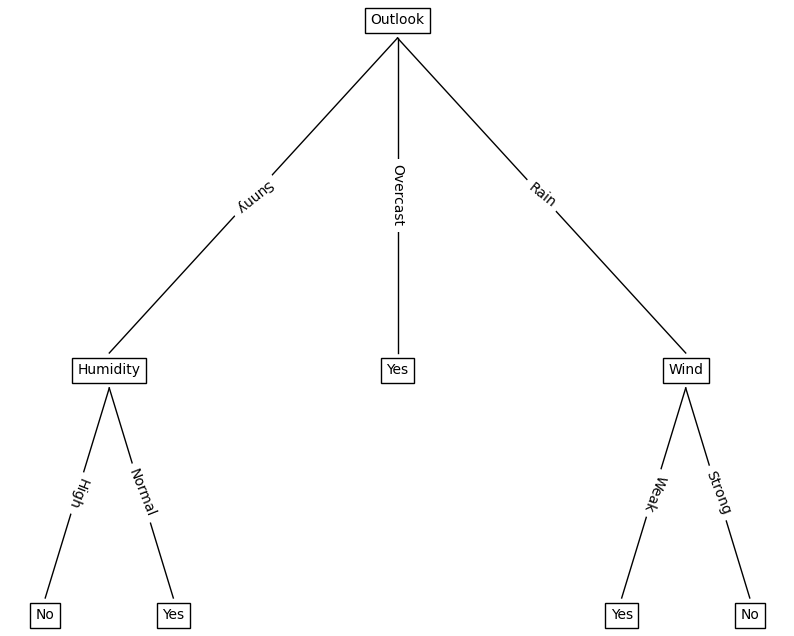

In [30]:
# Run this to check result
all_features = [col for col in tennis_df.columns if col != 'PlayTennis']
decision_tree = id3(tennis_df, 'PlayTennis', all_features)
print("Decision Tree:")
pprint.pp(decision_tree)
if decision_tree is not None:
    visualise_tree(decision_tree) 

**Public Test Case: Q4**

In [32]:
def are_nested_dictionaries_equal(dict1, dict2):
    """
    Recursively checks if two nested dictionaries are equal.

    Args:
        dict1 (dict): The first dictionary.
        dict2 (dict): The second dictionary.

    Returns:
        bool: True if the dictionaries are equal, False otherwise.
    """

    # Check if the keys are the same
    if dict1.keys() != dict2.keys():
        return False

    # Iterate through the items and compare values
    for key, value1 in dict1.items():
        value2 = dict2[key]

        # If both values are dictionaries, recurse
        if isinstance(value1, dict) and isinstance(value2, dict):
            if not are_nested_dictionaries_equal(value1, value2):
                return False
        # Otherwise, compare the values directly
        elif value1 != value2:
            return False

    return True


q4_true_ans = {
    'Outlook': {
        'Sunny': {
            'Humidity': {
                'High': 'No', 
                'Normal': 'Yes' 
            }
        },
    'Overcast': 'Yes',
    'Rain': {
        'Wind': {
            'Weak': 'Yes', 
            'Strong': 'No'
            }
        }
    }
}

q4_ans = id3(tennis_df, 'PlayTennis', all_features)

if not isinstance(q4_ans, dict):
    print(f"Public Test Case: Q4 - FAILED: Wrong type")
elif not are_nested_dictionaries_equal(q4_ans, q4_true_ans):
    print(f"Public Test Case: Q4 - FAILED: Incorrect value")
else:
    print(f"Public Test Case: Q4 - PASSED")

Public Test Case: Q4 - PASSED


# END